In [4]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    # create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results

# our vectorized training data
x_train = vectorize_sequences(train_data)
# our vectorized test data
x_test = vectorize_sequences(test_data)

In [12]:
# our vectorized labels:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [31]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 0s - loss: 0.5137 - acc: 0.7768 - val_loss: 0.3728 - val_acc: 0.8714
Epoch 2/20
15000/15000 [=

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

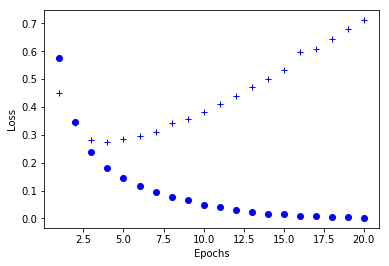

In [35]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

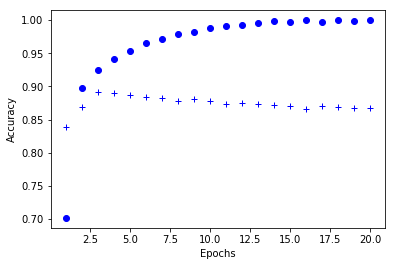

In [36]:
plt.clf()
# clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 0s - loss: 0.4632 - acc: 0.8204     

In [23]:
results

[0.29089688005447389, 0.88604000000000005]

In [24]:
model.predict(x_test)

array([[ 0.92321748],
       [ 0.84954739],
       [ 0.99948645],
       ..., 
       [ 0.42211711],
       [ 0.00336788],
       [ 0.74973959]], dtype=float32)

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

input_shape = (224, 224, 3)

model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(13, activation='softmax')
])

MemoryError: Error allocating 411041792 bytes of device memory (CNMEM_STATUS_OUT_OF_MEMORY).
Apply node that caused the error: GPU_mrg_uniform{CudaNdarrayType(float32, matrix),inplace}(<CudaNdarrayType(float32, vector)>, TensorConstant{[25088  4096]})
Toposort index: 0
Inputs types: [CudaNdarrayType(float32, vector), TensorType(int64, vector)]
Inputs shapes: [(92160,), (2,)]
Inputs strides: [(1,), (8,)]
Inputs values: ['not shown', array([25088,  4096])]
Outputs clients: [['output'], [GpuElemwise{Composite{(i0 + (i1 * i2))}}[(0, 2)](CudaNdarrayConstant{[[-0.01433848]]}, CudaNdarrayConstant{[[ 0.02867697]]}, GPU_mrg_uniform{CudaNdarrayType(float32, matrix),inplace}.1)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [102]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [87]:
import pickle
x_train_list = pickle.load( open( "x_train.pickle", "rb" ) )
y_train_list = pickle.load( open( "y_train.pickle", "rb" ) )
x_test_list = pickle.load( open( "x_test.pickle", "rb" ) )
y_test_list = pickle.load( open( "y_test.pickle", "rb" ) )

In [90]:
x_train = np.array(x_train_list)
y_train_number = np.array(y_train_list)
x_test = np.array(x_test_list)
y_test_number = np.array(y_test_list)

In [93]:
n_values = np.max(y_train_number) + 1
y_train = np.eye(n_values)[y_train_number]
y_test = np.eye(n_values)[y_test_number]

In [104]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)

Train on 15389 samples, validate on 3079 samples
Epoch 1/3


RuntimeError: Cuda error: k_copy_4d: out of memory.
Apply node that caused the error: GpuContiguous(GpuDimShuffle{0,3,1,2}.0)
Toposort index: 252
Inputs types: [CudaNdarrayType(float32, 4D)]
Inputs shapes: [(64, 3, 224, 224)]
Inputs strides: [(150528, 1, 672, 3)]
Inputs values: ['not shown']
Outputs clients: [[GpuDnnConv{algo='small', inplace=True}(GpuContiguous.0, GpuContiguous.0, GpuAllocEmpty.0, GpuDnnConvDesc{border_mode='half', subsample=(1, 1), conv_mode='conv', precision='float32'}.0, Constant{1.0}, Constant{0.0}), GpuDnnConvGradW{algo='none', inplace=True}(GpuContiguous.0, GpuContiguous.0, GpuAllocEmpty.0, GpuDnnConvDesc{border_mode='half', subsample=(1, 1), conv_mode='conv', precision='float32'}.0, Constant{1.0}, Constant{0.0})]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.